In [3]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [5]:
data = datasets.mnist.load_data()
class_labels = ['Zero','One','Two','Three','Four', 'Five', 'Six' , 'Seven', 'Eight', 'Nine']

In [6]:
(train_images, train_labels), (test_images, test_labels) = data

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

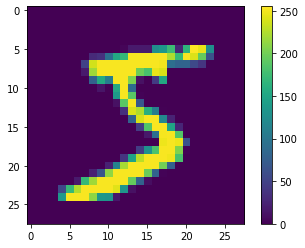

In [10]:
# lets plot our first picture of dataset 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_labels[0]

5

In [12]:
# nowg grayscale all the images 
train_images = train_images / 255.0
test_images = test_images / 255.0

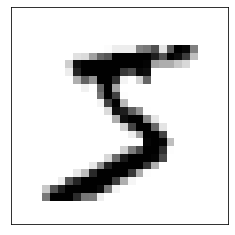

In [13]:
# now plot 
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

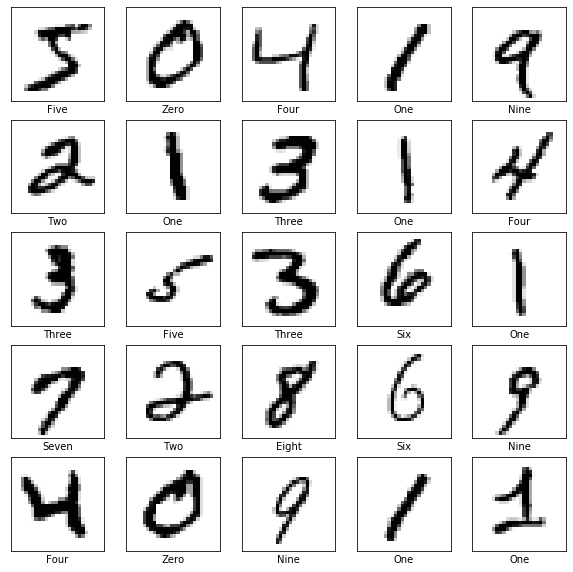

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5 ,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_labels[train_labels[i]])
plt.show()

In [15]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [16]:
# all are these layers excepts first will work as hidden layers

model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 53,400
Trainable params: 53,400
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10 ,activation='softmax')) # 10 output

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
history = model.fit(train_images,train_labels,batch_size=128,epochs=10,verbose=2,validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 3s - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.0300 - val_accuracy: 0.9903
Epoch 2/10
60000/60000 - 3s - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0352 - val_accuracy: 0.9905
Epoch 3/10
60000/60000 - 3s - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.0307 - val_accuracy: 0.9913
Epoch 4/10
60000/60000 - 3s - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0296 - val_accuracy: 0.9919
Epoch 5/10
60000/60000 - 4s - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0283 - val_accuracy: 0.9931
Epoch 6/10
60000/60000 - 4s - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0293 - val_accuracy: 0.9925
Epoch 7/10
